In [23]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as  mpl

%matplotlib inline 
mpl.rcParams['figure.dpi'] = 200 # Setter dpi til figuren til 200 (bedre kvalitet)

# Gitte verdier
l = 1
g = 9.8
theta_0 = 0.2
vinkelhastighet_0 = 0.0
q = 1.0
omega_driv = 3.13
drivkraft = 0.2

Oppgave 1:

$$\frac{d^2 \theta}{dt^2} + q \frac{d \theta}{dt} + \frac{g}{l} \theta = \frac{F_D}{ml} \sin{(\omega_D t)}  $$
La $x_0 = \theta$ og $x_1 = \frac{d \theta}{dt}$, da skaffer vi:  
$$\frac{dx_0}{dt} = x_1$$  
$$\frac{dx_1}{dt} = \frac{F_D}{ml} \sin{(\omega_D t)} - qx_1 - \frac{g}{l}x_0 $$

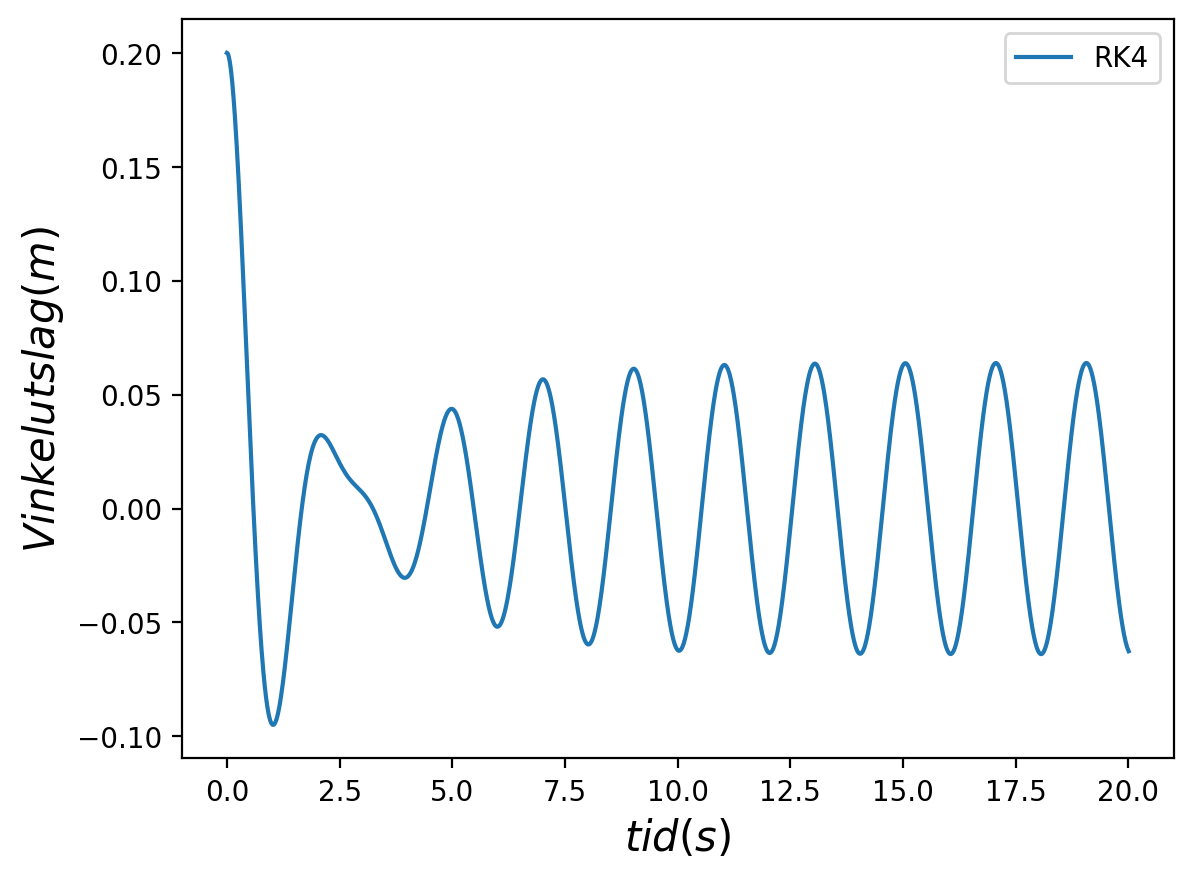

In [28]:

def equation(t, X):
    theta, omega = X
    dtheta_dt = omega # First degree
    domega_dt = drivkraft * np.sin(omega_driv * t) - q * omega - g/l * theta # Second degree

    return [dtheta_dt, domega_dt]


# Initialverdier
y_0 = [theta_0, vinkelhastighet_0]

# Parametre
t_0 = 0
t_1 = 20
dt = 0.01

def RK4_metode(RHS, y0, t0, t1, dt):
    t = np.arange(t0, t1 + dt, dt)
    n = len(t)
    y = np.zeros((len(y0), n))
    y[:, 0] = y0
    
    for i in range(n - 1):
        ti = t[i]
        yi = y[:, i]
        k1 = dt * np.array(RHS(ti, yi))
        k2 = dt * np.array(RHS(ti + dt/2, yi + k1/2))
        k3 = dt * np.array(RHS(ti + dt/2, yi + k2/2))
        k4 = dt * np.array(RHS(ti + dt, yi + k3))
        y[:, i + 1] = yi + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return y, t

y, t = RK4_metode(equation, y_0, t_0, t_1, dt)

plt.plot(t, y[0,:], label = "RK4")
plt.legend()
plt.xlabel('$tid (s) $', fontsize = 15)
plt.ylabel('$Vinkelutslag (m)$', fontsize = 15)
plt.show()

Her har vi brukt Runge-Kutta (RK5) metoden for å løse bevegelsesligningen. (Utregningen er gitt ovenfor). Slik startbetingelsene er gitt, ser vi at dempingen først roer pendelen ned til et lavt vinkelutslag. Så økes vinkelfrekvensen grunnet drivkraften før alt stabiliseres til en nesten konstant vinkelutslag.

Oppgave 2:

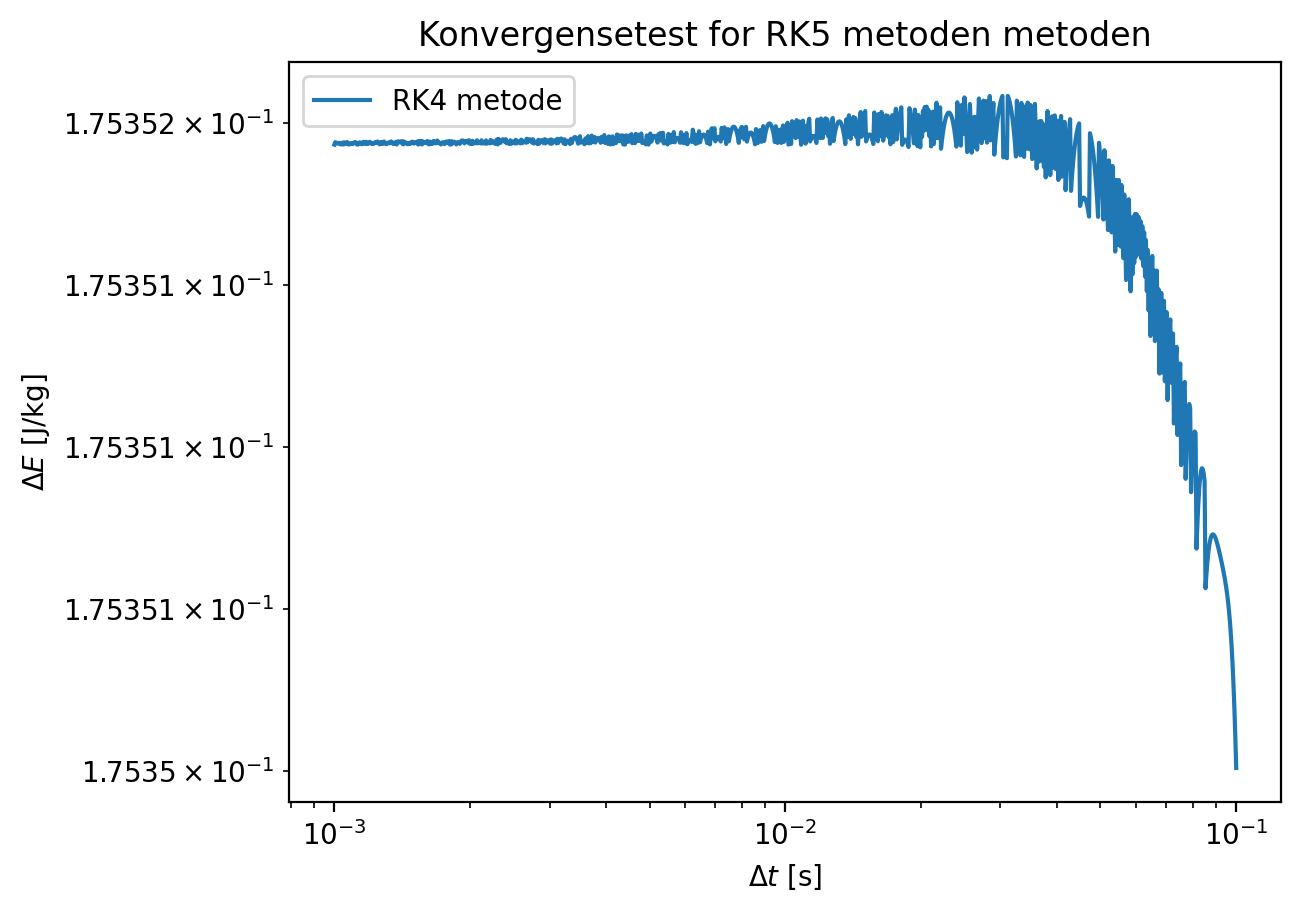

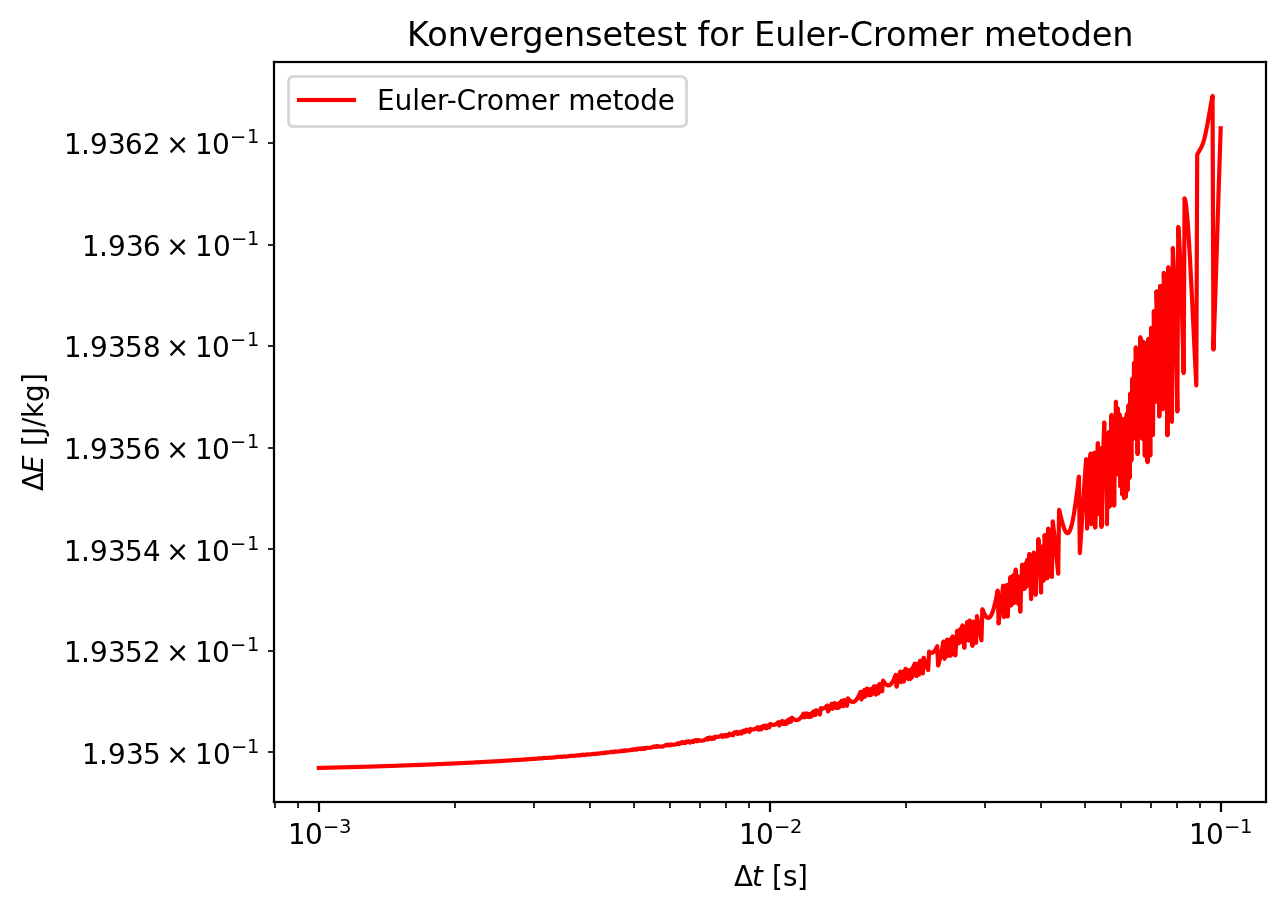

In [32]:

def euler_cromer(theta_0, theta_dot_0, dt, t_1):
    t = np.arange(0, t_1+dt/2, dt)
    n = t.shape[0]
    tetta = np.empty(n)
    w = np.empty(n)
    tetta[0] = theta_0           
    w[0] = theta_dot_0           
    for i in range(n-1):       
        w[i+1] = w[i] + drivkraft * np.sin(omega_driv * t[i]) - q * w[i] - g/l * tetta[i]
        tetta[i+1] = tetta[i] + w[i+1]*dt
    return tetta, w, t

def RK45_metode_energycomparison(RHS, y_0, t_1, dt, t_0=0):
    # bruker funksjonen ovenfor
    y, t = RK4_metode(RHS, y_0, t_0, t_1, dt)
    x = y[0, :]  # theta 
    w = y[1, :]  
    return x, w, t

def relative_potential(theta):
     return g * l * (1-np.cos(theta))
def relative_kinetic(omega):
     return 1/2 * l**2 * omega**2
def total_energy(theta, omega):
     return relative_kinetic(omega) + relative_potential(theta)

def convergence_comparison():
     dt_min = 0.001
     dt_max = 0.1
     N = 1000
     dt_array = np.geomspace(dt_min, dt_max, N) 
     diff_array = np.empty(N)
     euler_cromer_diff_array = np.empty(N)

     for j in range(N):
          theta, w, t = RK45_metode_energycomparison(equation, [theta_0, vinkelhastighet_0], t_1 = 20, dt = dt_array[j])
          E_total = total_energy(theta, w)
          diff_array[j] = np.abs(E_total[-1] - E_total[0]) # Absolutt forskjell mellom siste og første verdi

     for j in range(N): # Gjør akkurat det samme med euler cromer
          theta, w, t = euler_cromer(theta_0, vinkelhastighet_0, t_1 = 20, dt = dt_array[j])
          E_total = total_energy(theta, w)
          euler_cromer_diff_array[j] = np.abs(E_total[-1] - E_total[0]) # Absolutt forskjell mellom siste og første verdi
     return [(diff_array, dt_array), (euler_cromer_diff_array, dt_array)]

data = convergence_comparison()
diff_RK4, dt_RK4 = data[0]
diff_eul_cro, dt_eul_cro = data[1]

plt.figure()
plt.loglog(dt_RK4, diff_RK4, label = 'RK4 metode')
plt.legend()
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$\Delta E$ [J/kg]')
plt.title('Konvergensetest for RK5 metoden metoden')
plt.show()

plt.figure()
plt.loglog(dt_eul_cro, diff_eul_cro, label = 'Euler-Cromer metode', color = 'red')
plt.legend()
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$\Delta E$ [J/kg]')
plt.title('Konvergensetest for Euler-Cromer metoden')
plt.show()




Vi ser i begge figurene at grafen begynner å stabilisere seg (mot venstre) når delta-t bikker 0.01 og vi kan dermed konkludere at vår valgte delta-t er tilstrekkelig for våre formål (studere pendelens bevegelse), men om man leter etter nøyaktige verdier kan det være smart å sette delta-t ned til ihvertfall 0.005 (der grafen begynner å se nesten-linær ut).

Oppgave 3:

<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:34: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Nuggy\AppData\Local\Temp\ipykernel_17988\1883698452.py:34: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f"$\omega_D =$ {omega_driver[i-1]}")


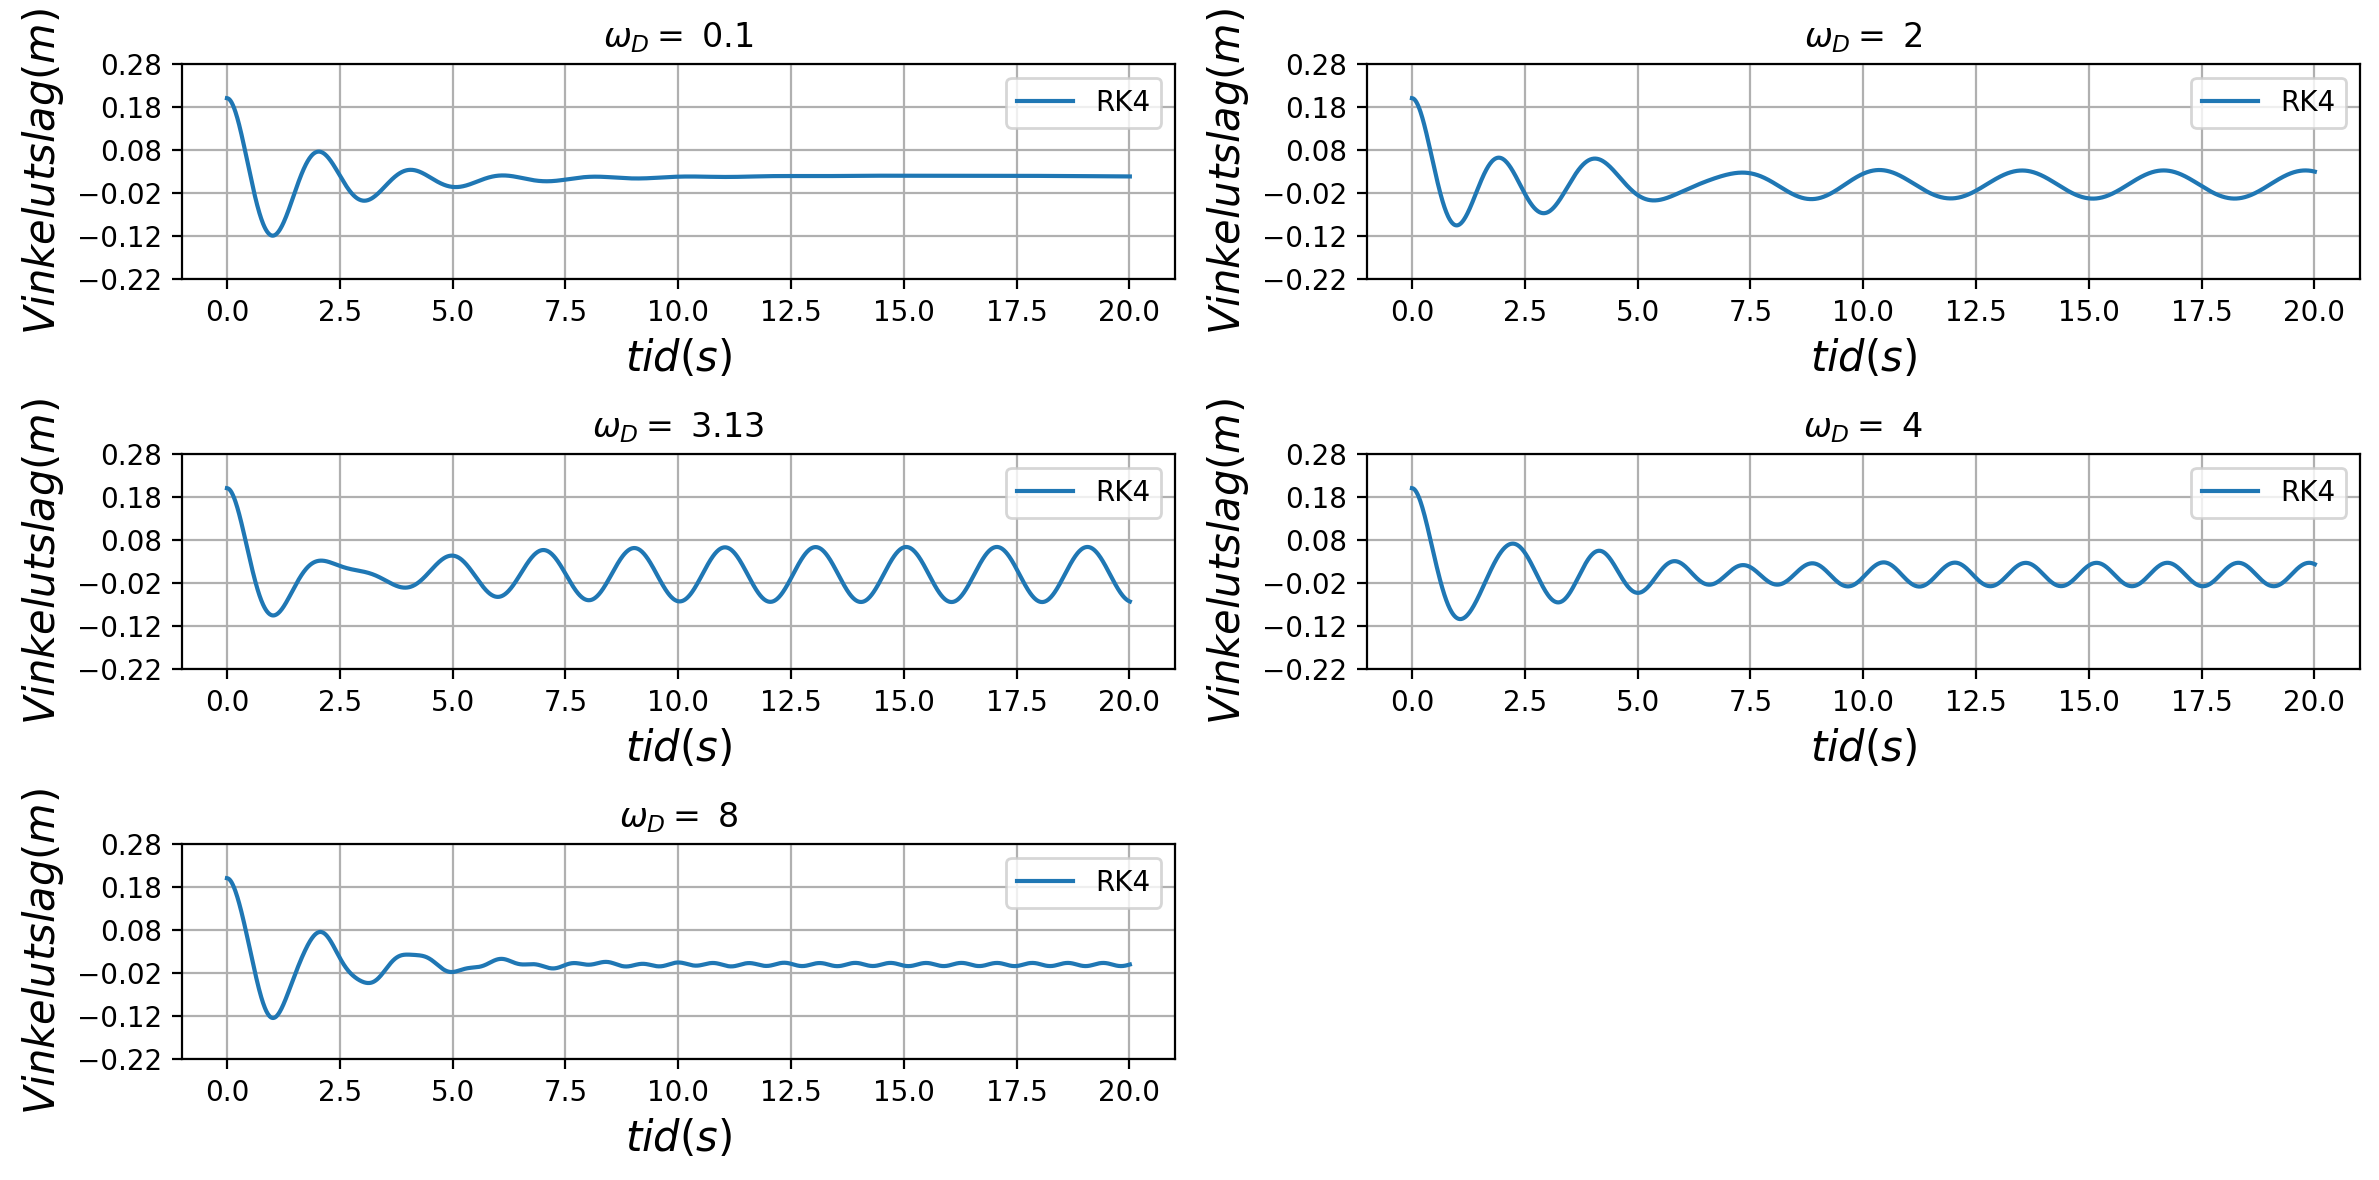

In [10]:
l = 1
g = 9.8
theta_0 = 0.2
vinkelhastighet_0 = 0.0
q = 1.0
omega_driv = 3.13
drivkraft = 0.2

omega_driver = [0.1, 2, 3.13, 4, 8]
y_list = []
for i in omega_driver:
    omega_driv = i
    y, t = RK45_metode(equation, y_0, t_0 = t_0, t_1 = t_1, dt = dt)
    y_list.append(y)

plots = len(y_list)
plt.figure(figsize=(12,6))
rows = (plots + 1) // 2
cols = 2
y_min = min(min(y) for y in y_list)
y_max = max(max(y) for y in y_list)
tick_interval = 0.1
y_ticks = np.round(np.arange(y_min - 0.1, y_max + 0.1, tick_interval), 2)

for i in range(1,plots+1):
    plt.subplot(rows,cols,i)
    plt.plot(t, y_list[i-1], label = "RK4")
    plt.legend()
    plt.ylim(y_min, y_max)
    plt.yticks(y_ticks)
    plt.grid()
    plt.xlabel('$tid (s) $', fontsize = 15)
    plt.ylabel('$Vinkelutslag (m)$', fontsize = 15)
    plt.title(f"$\omega_D =$ {omega_driver[i-1]}")
plt.tight_layout()
plt.show()

Ved å se på disse figurene kan vi klart se sammenhengen mellom drivfrekvensen og vinkelutslaget. Det ser ut til å være en direkte forhold mellom drivfrekvensen og frekvensen til pendelen (i det stabiliserte stadiet). Tiden det tar for pendelen å stabilisere seg er også avhengig av drivfrekvensen. Der w_D = 3.13 er stabiliseringen raskest (rundt 5 sekunder). Ved divergens fra w_D = 3.13 tar stabiliseringen lengre og lengre.

Oppgave 4:

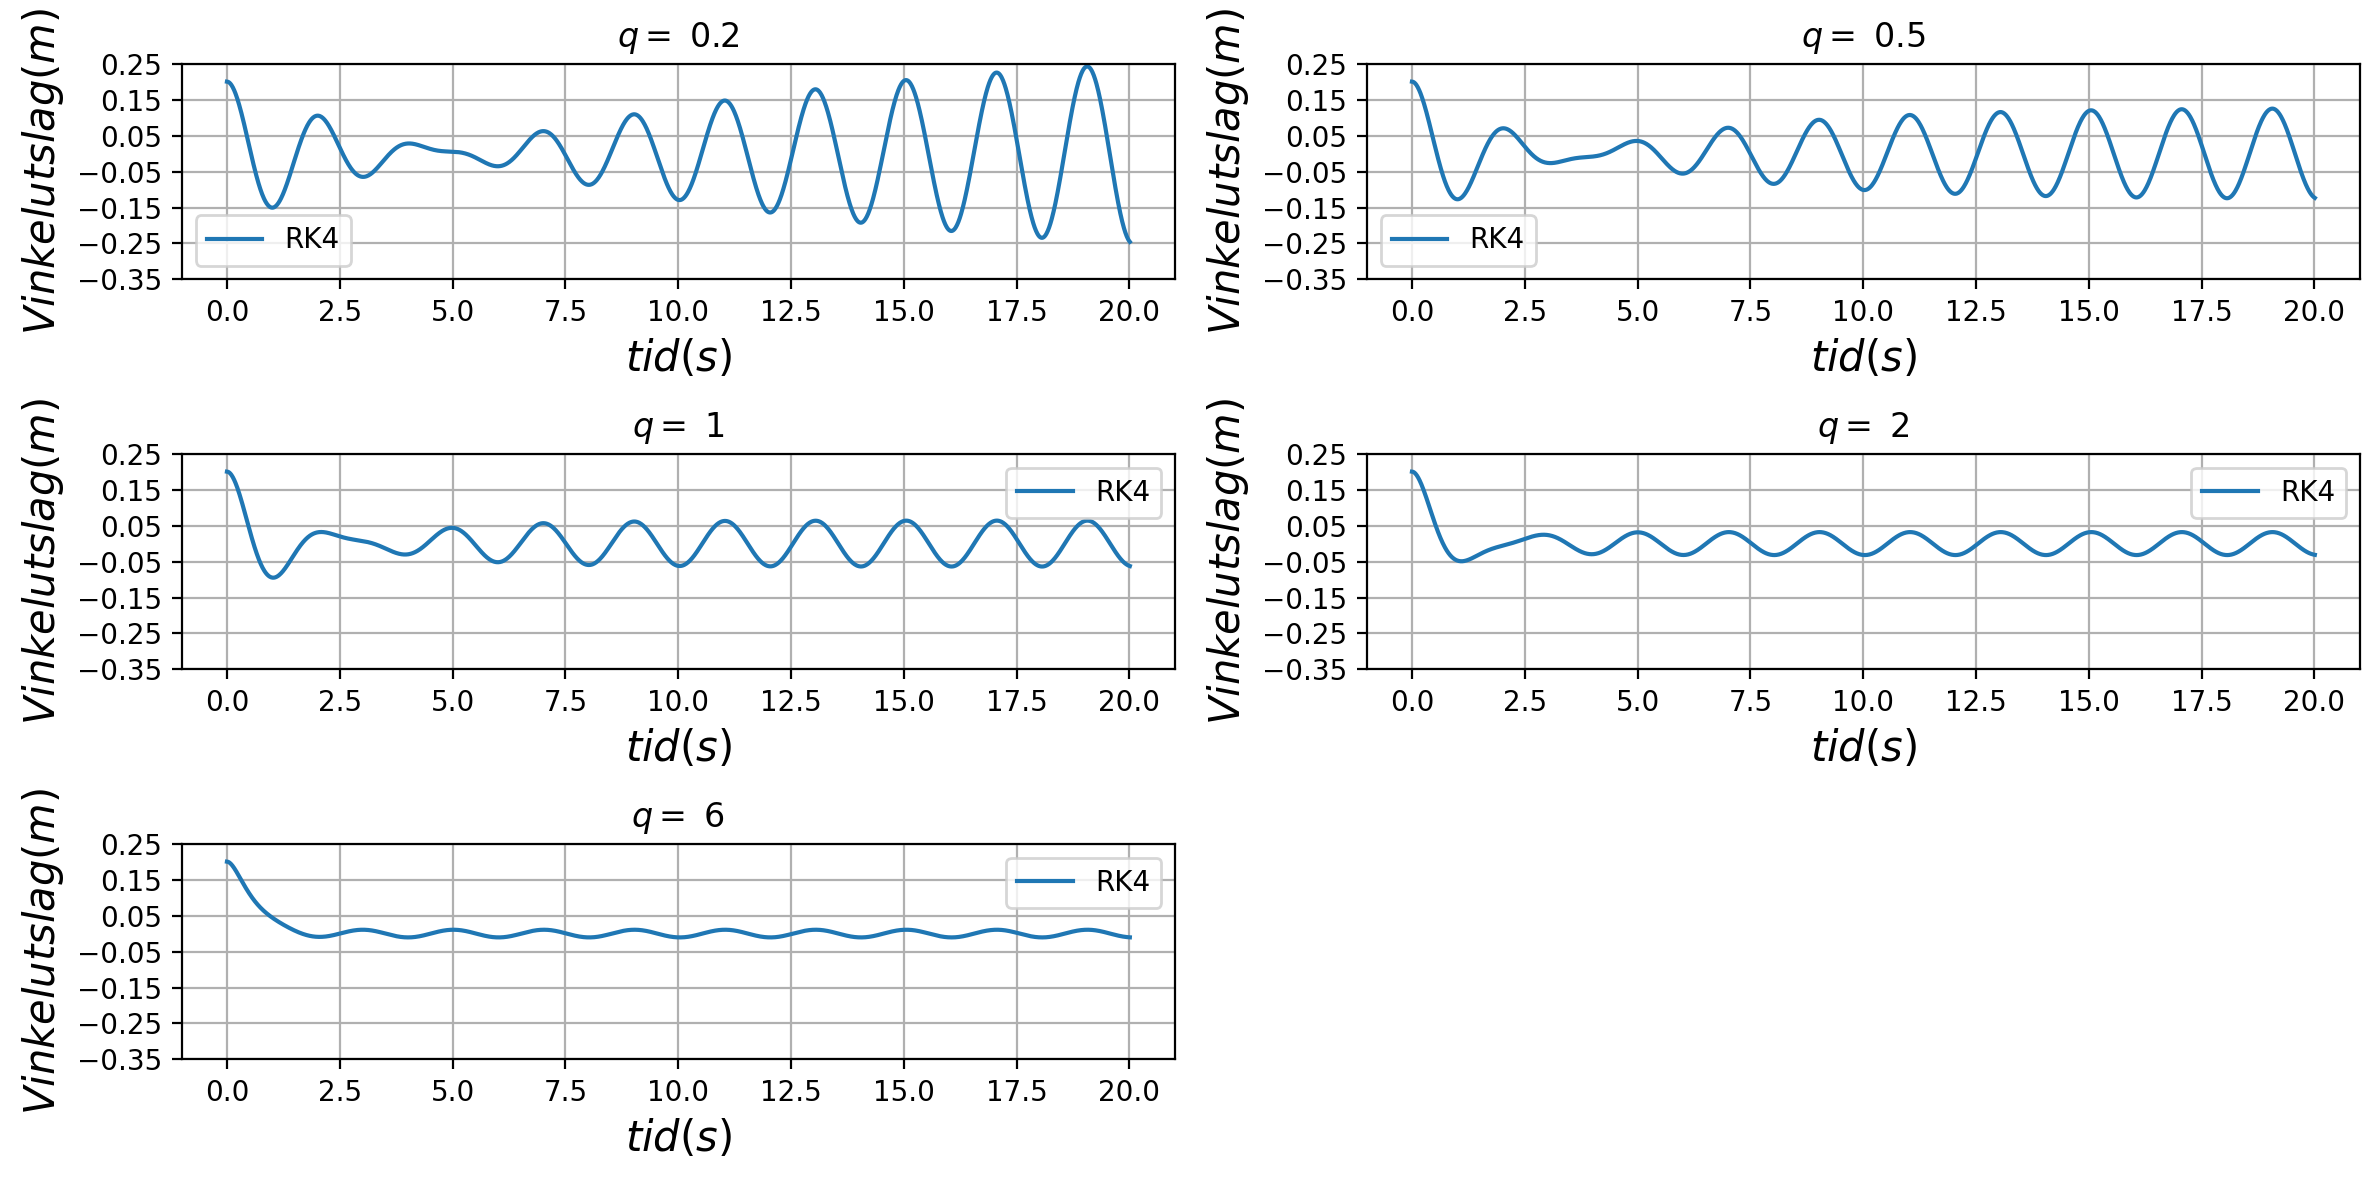

In [ ]:
l = 1
g = 9.8
theta_0 = 0.2
vinkelhastighet_0 = 0.0
q = 1.0
omega_driv = 3.13
drivkraft = 0.2

q_er = [0.2, 0.5, 1, 2, 6]
y_list = []
for i in q_er:
    q = i
    y, t = RK45_metode(equation, y_0, t_0 = t_0, t_1 = t_1, dt = dt)
    y_list.append(y)

plots = len(y_list)
plt.figure(figsize=(12,6))
rows = (plots + 1) // 2
cols = 2
y_min = min(min(y) for y in y_list)
y_max = max(max(y) for y in y_list)
tick_interval = 0.1
y_ticks = np.round(np.arange(y_min - 0.1, y_max + 0.1, tick_interval), 2)

for i in range(1,plots+1):
    plt.subplot(rows,cols,i)
    plt.plot(t, y_list[i-1], label = "RK4")
    plt.legend()
    plt.ylim(y_min, y_max)
    plt.yticks(y_ticks)
    plt.grid()
    plt.xlabel('$tid (s) $', fontsize = 15)
    plt.ylabel('$Vinkelutslag (m)$', fontsize = 15)
    plt.title(f"$q =$ {q_er[i-1]}")
plt.tight_layout()
plt.show()

Denne oppgaven viser oss at når friksjonsparameteren, q, øker - minker resonansamplituden. Ved høy demping kan altså pendelen så vidt svinge til å få en resonansfrekvens.

Oppgave 5:

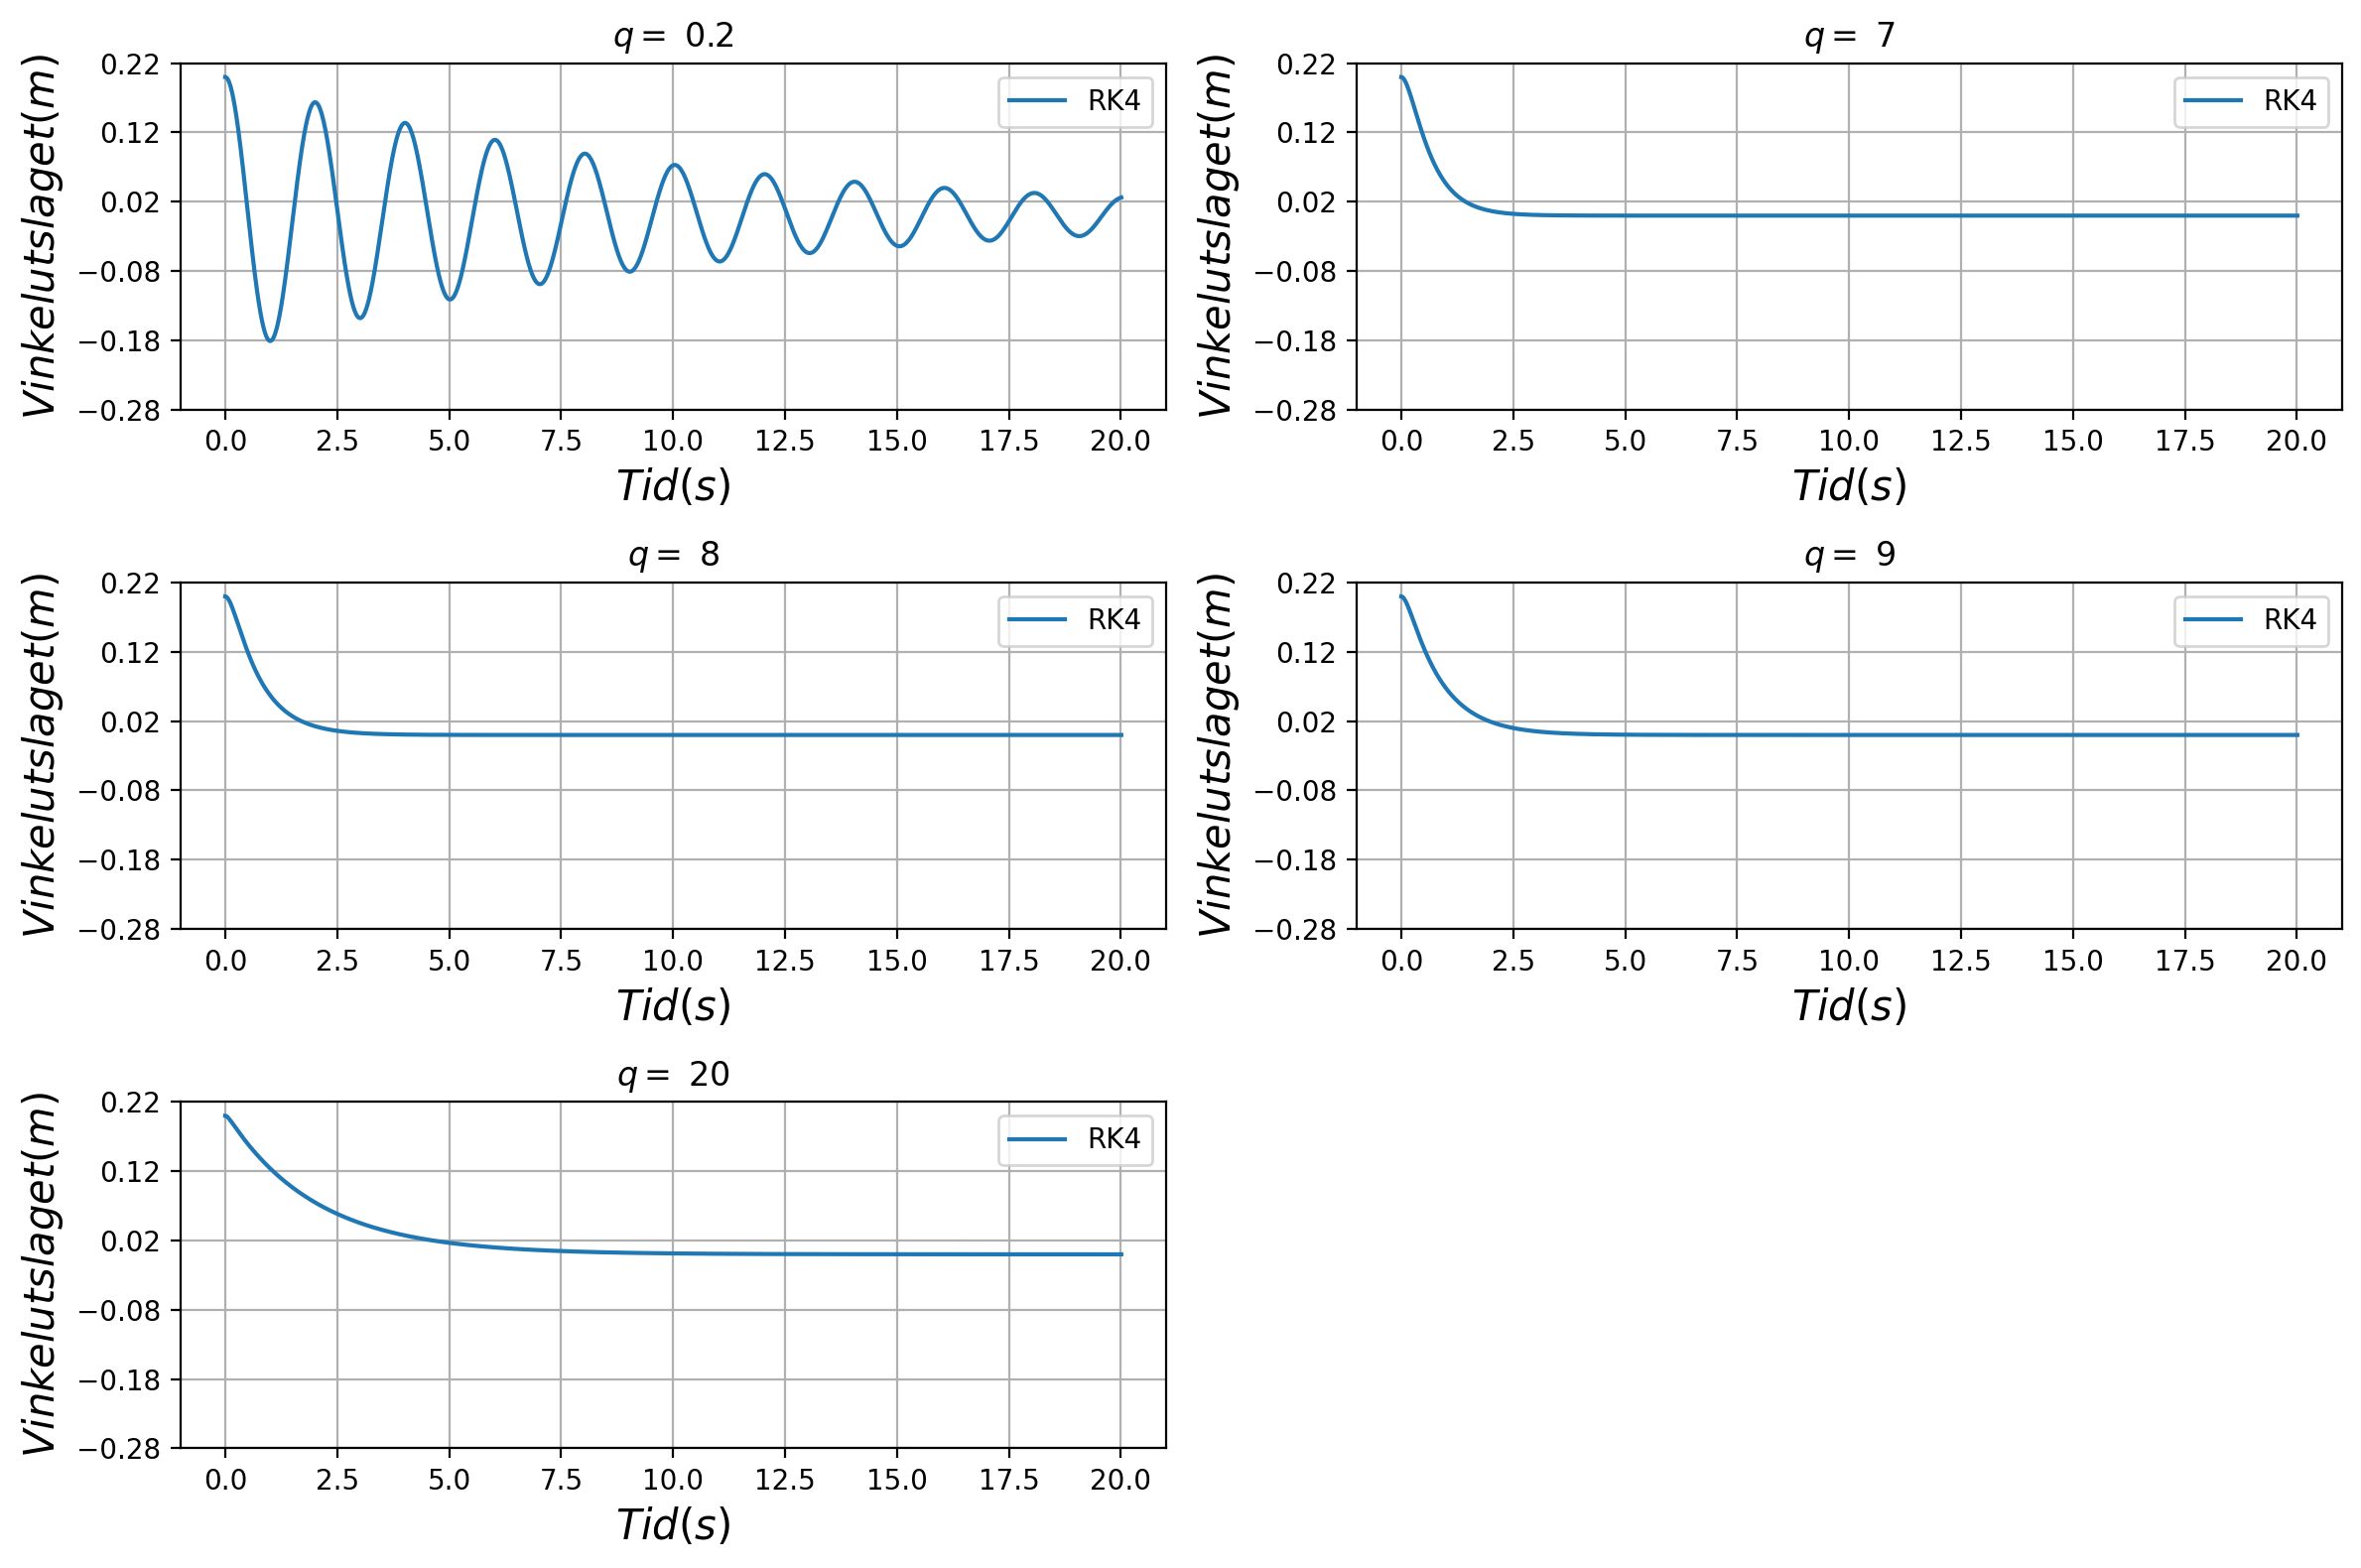

In [20]:
l = 1
g = 9.8
theta_0 = 0.2
vinkelhastighet_0 = 0.0
q = 1.0
omega_driv = 3.13
drivkraft = 0

#q_er = [0.2, 0.5, 1, 2, 10]
q_er = [0.2,7, 8,9, 20]
y_list = []
for i in q_er:
    q = i
    y, t = RK45_metode(equation, y_0, t_0 = t_0, t_1 = t_1, dt = dt)
    y_list.append(y)

plots = len(y_list)
plt.figure(figsize=(12,8))
rows = (plots + 1) // 2
cols = 2
y_min = min(min(y) for y in y_list)
y_max = max(max(y) for y in y_list)
tick_interval = 0.1
y_ticks = np.round(np.arange(y_min - 0.1, y_max + 0.1, tick_interval), 2)

for i in range(1,plots+1):
    plt.subplot(rows,cols,i)
    plt.plot(t, y_list[i-1], label = "RK4")
    plt.legend()
    plt.ylim(y_min, y_max)
    plt.yticks(y_ticks)
    plt.grid()
    plt.xlabel('$Tid (s) $', fontsize = 15)
    plt.ylabel('$Vinkelutslaget (m)$', fontsize = 15)
    plt.title(f"$q =$ {q_er[i-1]}")
plt.tight_layout()
plt.show()

Vi har konkludert at q = 8 er mer eller mindre den kritiske dempingen til systemet. Hvis vi hadde fått oppgitt en nøyaktig masse kunne vi funnet q analytisk. Ellers får vi en underkritisk demping når q<8 og overkritisk demping når q>8.